# 선형회귀 데이터 로딩(보스턴 주택가격 데이터)


In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = load_boston()

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [3]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# 모델학습

In [5]:
X = data.data
y = data.target

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=722)

In [8]:
X_train.shape, y_train.shape

((404, 13), (404,))

In [9]:
X_test.shape, y_test.shape

((102, 13), (102,))

In [10]:
# 선형모델
from sklearn.linear_model import LinearRegression

In [11]:
# 모델학습
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [12]:
# 학습된 가중치와 절편 확인
print("가중치 :",model.coef_)
print("절편 :",model.intercept_)

가중치 : [-1.18313515e-01  5.20521053e-02  1.76355388e-02  4.11554414e+00
 -2.01952839e+01  2.93408084e+00  1.01479948e-02 -1.56497280e+00
  3.16556945e-01 -1.25687293e-02 -1.01868234e+00  6.75071633e-03
 -5.73138231e-01]
절편 : 45.72482696295275


In [13]:
# 모델평가
model.score(X_test,y_test)

0.7454536557439619

In [14]:
# 다른 평가지표 사용
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE

In [15]:
pre = model.predict(X_test) # 예측값 생성
print("MAE :", mean_absolute_error(y_test,pre))
print("MSE :", mean_squared_error(y_test,pre))

MAE : 3.028568457448007
MSE : 17.925235768942024


- 평균 제곱 오차 공식
    - 오차의 제곱을 평균내주는 것
    - 그 오차가 가장 적은 것이 가장 이상적인 함수
    - 

## 선형모델의 학습 원리
1. 선형모델은 최적의 가중치(w)와 절편(b)를 선택하기 위해 MSE(평균제곱오차)를 이용해 각 가설의 적합성을 판단한다.
2. 최적의 가중치(w)와 절편 (b)를 만들기 위해서 2가지 방식을 활용한다.
    - 해석적 방법(Ordinary Least Squares) -> LinearRegression Class로 구현됨    전통적 방식
    - 경사 하강법(Gradient Descent Algorithm) -> SGDRegresso Class로 구현됨     오늘날 방식
        - 초기 가중치로부터 기울기 값을 조금씩 수정해서 찾아가는 방식
        - 기울기가 낮아지는 방향으로 계속 업데이트하는 공식
        

### 가중치 변화에 따른 MSE 변화 그래프를 그려보자

In [16]:
# 성적데이터 생성
data = pd.DataFrame([[2,20], [4,40], [8,80], [9,90]],
                   index=['해도', '예호', '형', '병관'],
                   columns=['공부시간','성적점수'])

In [17]:
data

,공부시간,성적점수
해도,2,20
예호,4,40
형,8,80
병관,9,90


### MSE 함수 생성

In [18]:
#문제, 정답, 가중치를 매개변수로 받는다
def MSE(X,y,w):
    #예측값 생성
    y_pre = (w*X)+0
    # 오차
    error = y-y_pre
    return (error**2).mean() #평균제곱오차

In [19]:
MSE(data['공부시간'],data['성적점수'], 9)    #결과값이 0이 나와야함.

41.25

### 그래프 그리기

In [20]:
# 변화하는 가중치(w) 생성
weights = np.linspace(0,20) #linsapce 생성하는 숫자들 간격 일정하게 만들어줌 (디폴트는 num = 50 50개로 쪼개줌)
weights

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [21]:
mse_list = []
for w in weights :
    mse_list.append(MSE(data['공부시간'], data['성적점수'], w))
    
mse_list

[4125.0,
 3795.1374427321953,
 3479.019158683882,
 3176.6451478550603,
 2888.015410245731,
 2613.1299458558933,
 2351.9887546855475,
 2104.5918367346935,
 1870.939192003332,
 1651.0308204914622,
 1444.8667221990836,
 1252.4468971261972,
 1073.771345272803,
 908.8400666389006,
 757.6530612244896,
 620.2103290295709,
 496.5118700541441,
 386.5576842982092,
 290.3477717617659,
 207.88213244481454,
 139.1607663473552,
 84.1836734693878,
 42.950853810912015,
 15.46230737192834,
 1.718034152436478,
 1.718034152436478,
 15.46230737192834,
 42.95085381091215,
 84.1836734693878,
 139.1607663473552,
 207.88213244481489,
 290.347771761766,
 386.5576842982092,
 496.5118700541442,
 620.2103290295709,
 757.6530612244901,
 908.8400666389006,
 1073.7713452728026,
 1252.4468971261979,
 1444.8667221990838,
 1651.0308204914627,
 1870.939192003332,
 2104.5918367346935,
 2351.988754685547,
 2613.129945855895,
 2888.015410245732,
 3176.6451478550607,
 3479.019158683883,
 3795.1374427321957,
 4125.0]

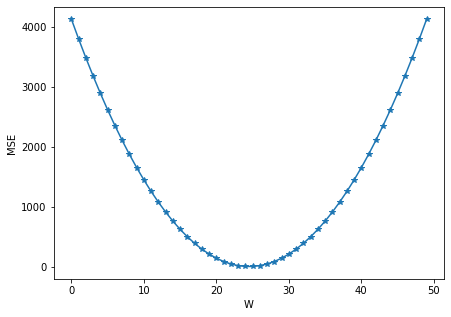

In [22]:
plt. figure(figsize=(7,5))
plt.plot(mse_list, marker='*')
plt.ylabel('MSE')
plt.xlabel('W')
plt.show()

### 경사하강법으로 구현된 SGDRegressor를 사용해보자.

In [23]:
from sklearn.linear_model import SGDRegressor

In [24]:
sgd_model = SGDRegressor()

In [25]:
sgd_model.fit(data[['공부시간']], data['성적점수'])   
#대괄호 두번은 2차원으로 나오라고 치는 것 일반적으로 모델은 특성이 여러개 들어가니까

SGDRegressor()

In [26]:
print("가중치 :", sgd_model.coef_)
print("절편 :", sgd_model.intercept_)

가중치 : [9.84149013]
절편 : [1.17362187]


In [27]:
sgd_model.predict([[7],[5]])

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([70.06405279, 50.38107253])

- max_iter -> 최대 미분 수
- eta0 -> learning rate 학습률 (너무커도 안되고 너무 작어도 안됨)

In [28]:
sgd_model = SGDRegressor(eta0=0.1,   #학습률
                         max_iter=6000,   #반복횟수(가중치 업데이트 횟수)
                         epsilon=0.001,   #최소 오차 기준값
                         n_iter_no_change=100,   #업데이트시 오차가 변경되지 않는걸 허용하는 횟수
                         verbose=1)   #과정을 살펴볼 수 있게 해줌

In [29]:
sgd_model.fit(data[['공부시간']], data['성적점수'])   

-- Epoch 1
Norm: 93.57, NNZs: 1, Bias: -12.348092, T: 4, Avg. loss: 19387.471819
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 42.61, NNZs: 1, Bias: 21.211917, T: 8, Avg. loss: 356159.674472
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 43.04, NNZs: 1, Bias: 29.771984, T: 12, Avg. loss: 5967.473919
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 23.60, NNZs: 1, Bias: 22.122684, T: 16, Avg. loss: 52996.058745
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 13.98, NNZs: 1, Bias: 10.381454, T: 20, Avg. loss: 30844.951908
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 20.96, NNZs: 1, Bias: 12.989402, T: 24, Avg. loss: 2247.559726
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 18.77, NNZs: 1, Bias: 10.631185, T: 28, Avg. loss: 15914.466109
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 15.96, NNZs: 1, Bias: 2.010146, T: 32, Avg. loss: 20330.447686
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 18.13, NNZs: 1, Bias: 5.559069, T: 36, Avg. loss: 2967.101

SGDRegressor(epsilon=0.001, eta0=0.1, max_iter=6000, n_iter_no_change=100,
             verbose=1)

In [30]:
print("가중치 :", sgd_model.coef_)
print("절편 :", sgd_model.intercept_)

가중치 : [10.00608301]
절편 : [-0.05552921]


# 선형모델의 장점
- 결과예측(추론) 속도가 빠르다.
- 대용량 데이터에도 충분히 활용 가능하다.
- 특성이 많은 데이터 세트라면 훌륭한 성능을 낼 수 있다.

# 해석적 방법을 활용한 고전적 선형모델의 단점
- 특성이 적은 저차원 데이터에서는 다른 모델의 일반화 성능이 더 좋을 수 있다. -> 특성확장을 하기도 한다.
- LinearRegression Model은 복잡도를 제어할 방법이 없어 과대적합 되기 쉽다. -> 모델 정규화를 통해 과대적합을 제어한다.

- optimizer: 최적화 도구
- 그중 경사하강법 GD 사용
- epoch
- loss function -> MSE

# 다항회귀
- y = (w1x1) + (w2x2) + (w3x3) ... +b
- 다항회귀 : y = (w1x1) + (w2x2^2) + (w2x2^3) ... + b (항의 차수가 높은 것도 포함
- 선형 모델의 수식에서 입력특성에 2차이상의 항이 포함된 경우
- 고차항이 포함되면 데이터의 특성을 더 fit하게 맞출 수 있어 성능 개선의 여지가 있다.
- 데이터에 너무 딱 맞게 가기 때문에 과대적합이 발생할 수 있다.

In [31]:
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)

C:\Users\AI\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data, boston.target, random_state=726)

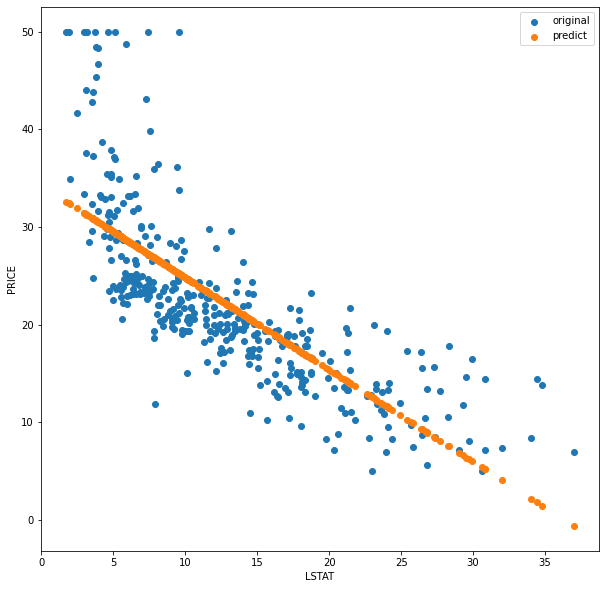

In [33]:
plt.figure(figsize=(10, 10)) #가로, 세로 크기 설정
plt.scatter(X_train['LSTAT'], y_train, label='original')

# 선형모델 학습
LSTAT_model = LinearRegression()
LSTAT_model.fit(X_train[['LSTAT']], y_train)
# 선형모델의 예측결과 확인
pre = LSTAT_model.predict(X_train[['LSTAT']])
plt.scatter(X_train[['LSTAT']], pre, label='predict')

plt.legend()
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.show()

#### 다항회귀 구현하기
1. 특성확장을 통해서 다항식을 만들어준다.
2. sklearn의 PolynomialFeatures를 이용한다.

In [34]:
# 특성 확장
X_train['LSTAT x LSTAT' ] = X_train['LSTAT']**2  #서로 다른 특성끼리 곱해서 다항회귀를 유도하기도 한다

In [35]:
# 모델학습
LSTAT_model2 = LinearRegression()
LSTAT_model2.fit(X_train[["LSTAT", 'LSTAT x LSTAT']], y_train)
# 모델예측
pre2 = LSTAT_model2.predict(X_train[["LSTAT", 'LSTAT x LSTAT']])

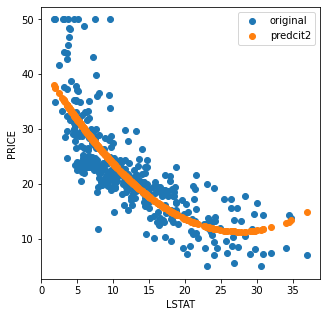

In [36]:
plt.figure(figsize=(5,5))
plt.scatter(X_train['LSTAT'], y_train, label='original')  #오리지날 데이터
plt.scatter(X_train['LSTAT'], pre2, label='predcit2')  #다항회귀 결과

plt.legend()
plt.xlabel('LSTAT')
plt.ylabel("PRICE")
plt.show()

# 릿지, 라쏘
    - 수학적 해석방법을 통한 전통적 Regression은 튜닝할 요소가 없다. 
    - 과대적합이 일어나버리면 어떻게할 수 없는 단점이 있다.
    - 그 단점을 어떻게 극복할지 고민의 결과가 릿지와 라쏘
    - 모델 정규화를 통화 과대적합을 해소
   
- 정규화: 가중치의 값을 조정하여 제약을 주는 것
    - 라쏘(Lasso/L1)
        - w의 모든 원소에 똑같은 힘으로 규제를 적용하는 방법. 특정 계수들은 0이 됨. 
        - ★특성선택이 자동으로 이루어짐★ (영향이 낮은 애들은 자동적으로 걸러지는 효과가 있음 그런 애들은 0으로 수렴하니까)
    - 릿지(Ridge/L2)
        - w의 모든 원소에 골고루 규제를 적용하여 0에 가깝게 만듬
        - 가중치가 큰 값들은 더 큰 규제를 주고, 가중치가 적은 값들은 더 적은 규제를 준다.